In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import xarray_behave as xb

ds = xb.load('localhost-20180716_130902.zarr')

/Users/jclemens/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [93]:
y = ds.song.values[100_000:120_000]

# x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd'
winlen = 200
f, t, psd = signal.spectrogram(y, 10_000, nperseg=winlen, noverlap=winlen/2, nfft=winlen*4, mode='magnitude')
f_idx = np.argmax(f>1000)
S = np.log2(1+psd[:f_idx,:])
S /= np.max(S)/255

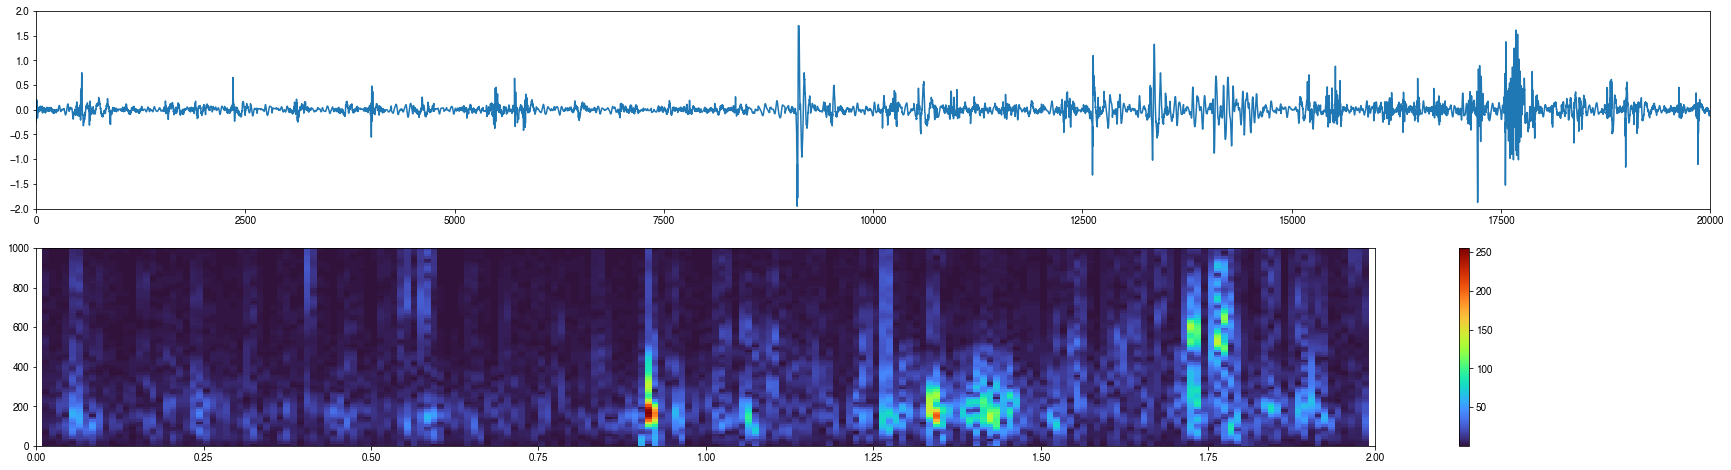

In [95]:
import numpy as np
plt.gcf().set_size_inches(30,8)
plt.subplot(211)
plt.plot(y)

f_idx = np.argmax(f>1000)
S = np.log2(1+psd[:f_idx,:])
S /= np.max(S)/255
plt.subplot(212)
# plt.imshow(np.log2(psd))
plt.pcolormesh(t, f[:f_idx], S, cmap='turbo')
plt.colorbar()

In [74]:
import turbo_colormap_mpl